In [40]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


## Problem Statement :

The aim of this project is to study stock market data to understand price trends and risks, so that better investment decisions can be made.

In [41]:
import yfinance as yf     

## Import Libraries

In [42]:
import pandas as pd          # For data manipulation and analysis
import numpy as pd           # For numerical operations
import matplotlib.pyplot as plt       # For basic data visualization
import seaborn as sns         # For advanced statistical visualizations

* Open – Price at market open
* High – Highest price of the day
* Low – Lowest price of the day
* Close – Price at market close
* Volume – Number of shares traded
* Daily Return – % change from previous close

## Load Dataset

In [43]:
df=yf.download("RELIANCE.NS",start="2025-12-01",end="2025-12-31")     # Loading the dataset into a pandas DataFrame

[*********************100%***********************]  1 of 1 completed


## Basic EDA

In [44]:
# Display the first 5 rows of the dataframe to preview its structure and content
df.head()                    

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-12-01,1566.099976,1577.500000,1563.599976,1575.000000,8920233
2025-12-02,1546.300049,1567.500000,1542.000000,1561.099976,11389150
2025-12-03,1538.800049,1552.400024,1533.000000,1545.199951,6090883
2025-12-04,1535.599976,1560.500000,1517.599976,1536.000000,11867930
2025-12-05,1540.599976,1545.800049,1520.599976,1530.400024,10183266


In [45]:
# Display the last 5 rows of the dataframe
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-12-24,1558.199951,1575.699951,1553.599976,1572.699951,8815745
2025-12-25,1558.199951,1558.199951,1558.199951,1558.199951,0
2025-12-26,1559.199951,1561.000000,1554.300049,1554.699951,2311495
2025-12-29,1545.599976,1558.099976,1543.599976,1554.900024,5972105
2025-12-30,1539.800049,1553.599976,1537.800049,1547.000000,8815884


In [46]:
# Get the dimensions of the dataframe (number of rows, number of columns)
df.shape

(22, 5)

In [47]:
# Get the column names 
df.columns

MultiIndex([( 'Close', 'RELIANCE.NS'),
            (  'High', 'RELIANCE.NS'),
            (   'Low', 'RELIANCE.NS'),
            (  'Open', 'RELIANCE.NS'),
            ('Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [48]:
# Display summary of the DataFrame :

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2025-12-01 to 2025-12-30
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   22 non-null     float64
 1   (High, RELIANCE.NS)    22 non-null     float64
 2   (Low, RELIANCE.NS)     22 non-null     float64
 3   (Open, RELIANCE.NS)    22 non-null     float64
 4   (Volume, RELIANCE.NS)  22 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.0 KB


In [49]:
# Check the number of missing values in each column 
df.isnull().sum()

Price   Ticker     
Close   RELIANCE.NS    0
High    RELIANCE.NS    0
Low     RELIANCE.NS    0
Open    RELIANCE.NS    0
Volume  RELIANCE.NS    0
dtype: int64

In [50]:
# Check the data types of each column in the DataFrame 'df'

df.dtypes

Price   Ticker     
Close   RELIANCE.NS    float64
High    RELIANCE.NS    float64
Low     RELIANCE.NS    float64
Open    RELIANCE.NS    float64
Volume  RELIANCE.NS      int64
dtype: object

In [51]:
# Generate descriptive statistics for the DataFrame

df.describe()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01
mean,1549.895452,1559.340904,1542.049999,1551.209084,8.082236e+06
std,12.364812,11.421014,14.703767,14.421804,3.392566e+06
min,1529.400024,1542.500000,1517.599976,1530.400024,0.000000e+00
25%,1541.024994,1551.125000,1533.500000,1539.474976,6.001800e+06
50%,1545.299988,1558.149963,1540.650024,1550.400024,8.403687e+06
75%,1558.199951,1565.875000,1552.949982,1557.374969,1.102233e+07
max,1575.400024,1580.900024,1568.099976,1580.900024,1.393728e+07


# Plotting

Text(0, 0.5, 'Closing Price')

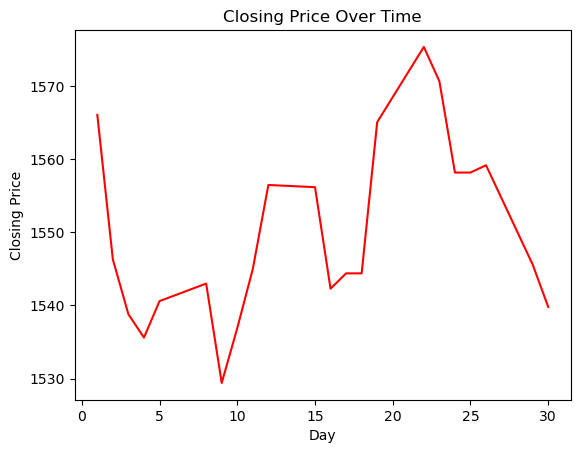

In [53]:
# Create a line plot of closing prices over time
plt.plot(df.index.day, df['Close'], color='red')
plt.title("Closing Price Over Time")
plt.xlabel("Day")
plt.ylabel("Closing Price")

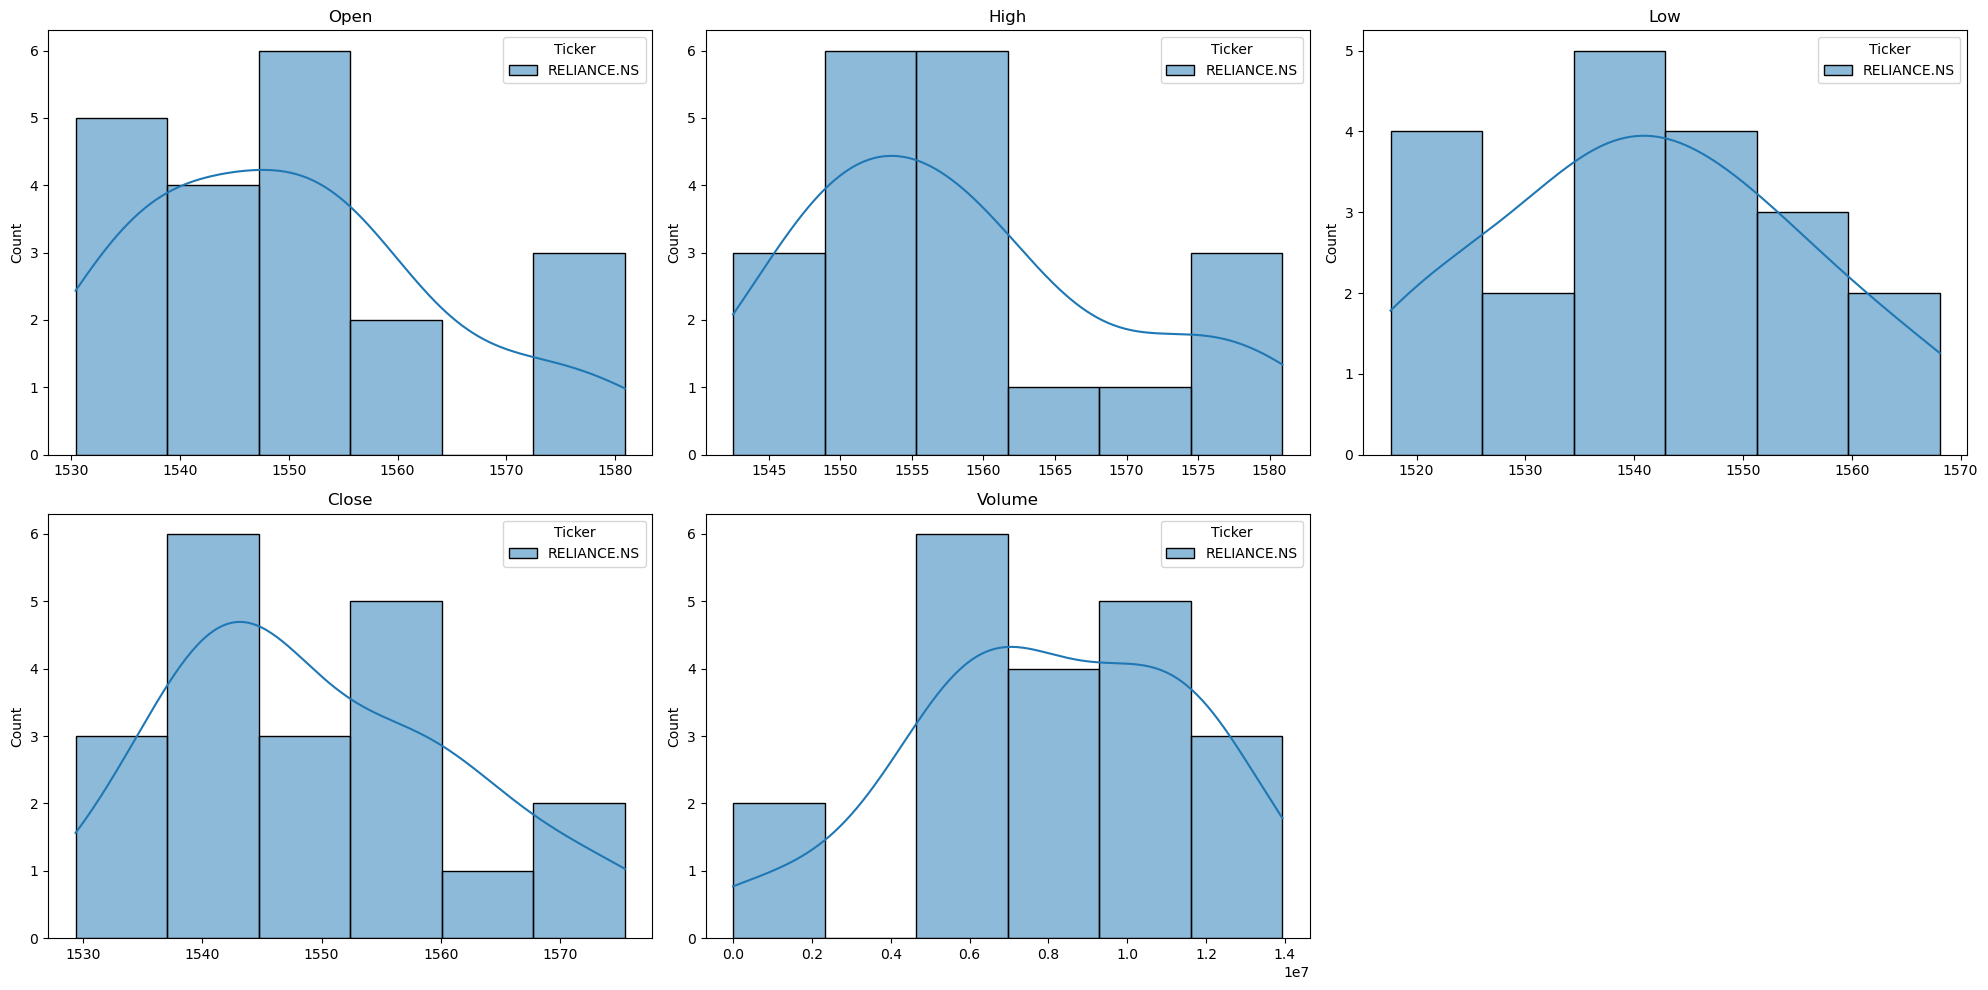

In [91]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)  
    plt.title(col)

plt.tight_layout()
plt.show()

In [55]:
 # Open and Close price to understand daily behavior
df[['Open','Close']].head()

Price,Open,Close
Ticker,RELIANCE.NS,RELIANCE.NS
Date,,
2025-12-01,1575.000000,1566.099976
2025-12-02,1561.099976,1546.300049
2025-12-03,1545.199951,1538.800049
2025-12-04,1536.000000,1535.599976
2025-12-05,1530.400024,1540.599976


In [56]:
# To check daily percent change in price
df['daily_return']=df['Close'].pct_change()

In [57]:
df.head()

Price,Close,High,Low,Open,Volume,daily_return
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
Date,,,,,,
2025-12-01,1566.099976,1577.500000,1563.599976,1575.000000,8920233,NaN
2025-12-02,1546.300049,1567.500000,1542.000000,1561.099976,11389150,-0.012643
2025-12-03,1538.800049,1552.400024,1533.000000,1545.199951,6090883,-0.004850
2025-12-04,1535.599976,1560.500000,1517.599976,1536.000000,11867930,-0.002080
2025-12-05,1540.599976,1545.800049,1520.599976,1530.400024,10183266,0.003256


In [58]:
df[['Close','daily_return']].head()

Price,Close,daily_return
Ticker,RELIANCE.NS,
Date,,
2025-12-01,1566.099976,NaN
2025-12-02,1546.300049,-0.012643
2025-12-03,1538.800049,-0.004850
2025-12-04,1535.599976,-0.002080
2025-12-05,1540.599976,0.003256


Text(0, 0.5, 'Daily Return')

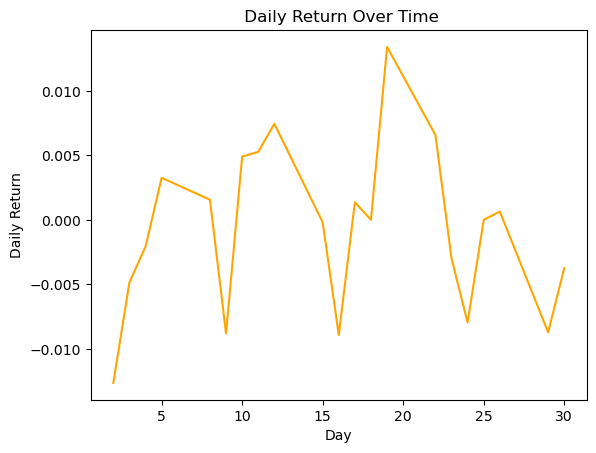

In [59]:
# Ploted the daily returns over time 
plt.plot(df.index.day,df['daily_return'],color='orange')
plt.title(" Daily Return Over Time")
plt.xlabel("Day")
plt.ylabel("Daily Return")

## Prediction

- **Target – Tomorrow Return:**

    Percentage change in closing price from today to the next trading day; used to predict short-term stock movement.

- **Features – Today Market Data:**

    Today’s Open, High, Low, Close, Volume, and Daily Return; they describe current price behavior and trading activity used to predict tomorrow’s return.

In [60]:
df['target_return']=df['daily_return'].shift(-1)

In [61]:
df.head()

Price,Close,High,Low,Open,Volume,daily_return,target_return
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
Date,,,,,,,
2025-12-01,1566.099976,1577.500000,1563.599976,1575.000000,8920233,NaN,-0.012643
2025-12-02,1546.300049,1567.500000,1542.000000,1561.099976,11389150,-0.012643,-0.004850
2025-12-03,1538.800049,1552.400024,1533.000000,1545.199951,6090883,-0.004850,-0.002080
2025-12-04,1535.599976,1560.500000,1517.599976,1536.000000,11867930,-0.002080,0.003256
2025-12-05,1540.599976,1545.800049,1520.599976,1530.400024,10183266,0.003256,0.001558


In [62]:
df=df.dropna()

In [63]:
df.isna().sum()

Price          Ticker     
Close          RELIANCE.NS    0
High           RELIANCE.NS    0
Low            RELIANCE.NS    0
Open           RELIANCE.NS    0
Volume         RELIANCE.NS    0
daily_return                  0
target_return                 0
dtype: int64

In [64]:
df.head()

Price,Close,High,Low,Open,Volume,daily_return,target_return
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
Date,,,,,,,
2025-12-02,1546.300049,1567.500000,1542.000000,1561.099976,11389150,-0.012643,-0.004850
2025-12-03,1538.800049,1552.400024,1533.000000,1545.199951,6090883,-0.004850,-0.002080
2025-12-04,1535.599976,1560.500000,1517.599976,1536.000000,11867930,-0.002080,0.003256
2025-12-05,1540.599976,1545.800049,1520.599976,1530.400024,10183266,0.003256,0.001558
2025-12-08,1543.000000,1551.000000,1535.000000,1539.199951,11301491,0.001558,-0.008814


In [65]:
# Features 

X = df[[
    "Open","Close","High","Low","Volume","daily_return"
]]

In [66]:
y = df['target_return']

In [67]:
X.shape, y.shape

((20, 6), (20,))

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

In [70]:
X_train = X.iloc[:split_index]
9X_test = X.iloc[split_index:]

In [71]:
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [73]:
model = LinearRegression()

In [74]:
model.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
y_pred

array([-0.00608831, -0.00344972, -0.0018567 , -0.00319433])

In [78]:
mae = mean_absolute_error(y_test,y_pred)

In [79]:
r2 = r2_score(y_test,y_pred)

In [80]:
print(mae)
print(r2)

0.004400929019236152
-0.8222316635035078


<Figure size 1200x600 with 0 Axes>

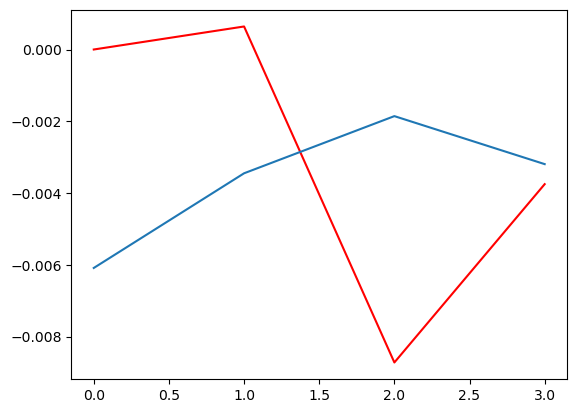

<Figure size 1200x600 with 0 Axes>

In [118]:
plt.plot(y_test.values, label = "Actual Return" , color="Red")
plt.plot(y_pred, label = "Predicted Return")
plt.figure(figsize=(12,6))